In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import librosa
import librosa.display
from tqdm import tqdm

# belly_pain

In [2]:
belly_pain = "baby_cry/belly_pain/549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav"

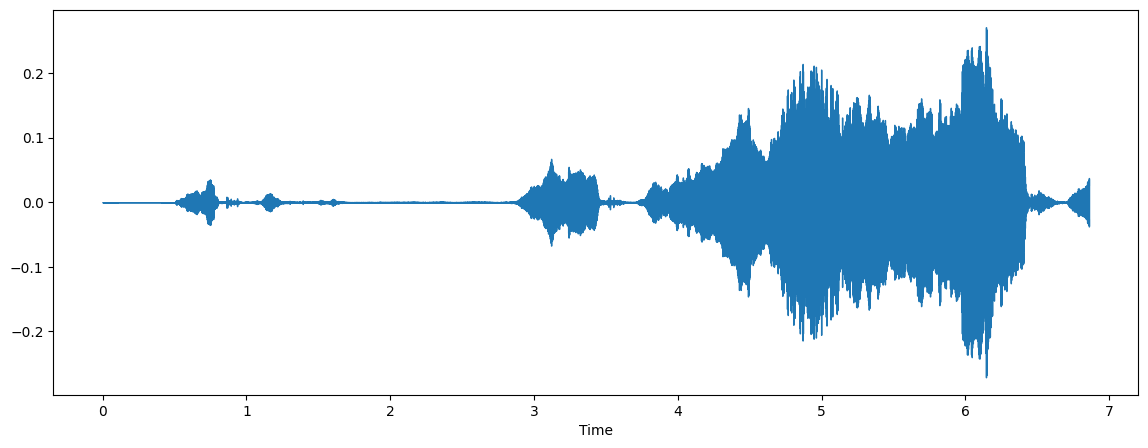

In [3]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(belly_pain)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(belly_pain)

# burping

In [4]:
burping = "baby_cry/burping/5afc6a14-a9d8-45f8-b31d-c79dd87cc8c6-1430757039803-1.7-m-48-bu.wav"

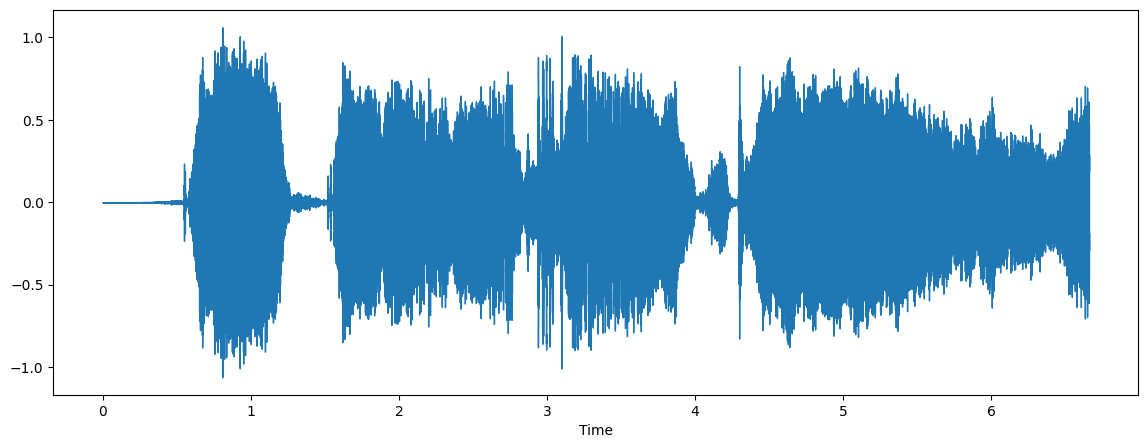

In [5]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(burping)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(burping)

# discomfort

In [6]:
discomfort = "baby_cry/discomfort/10A40438-09AA-4A21-83B4-8119F03F7A11-1430925142-1.0-f-26-dc.wav"

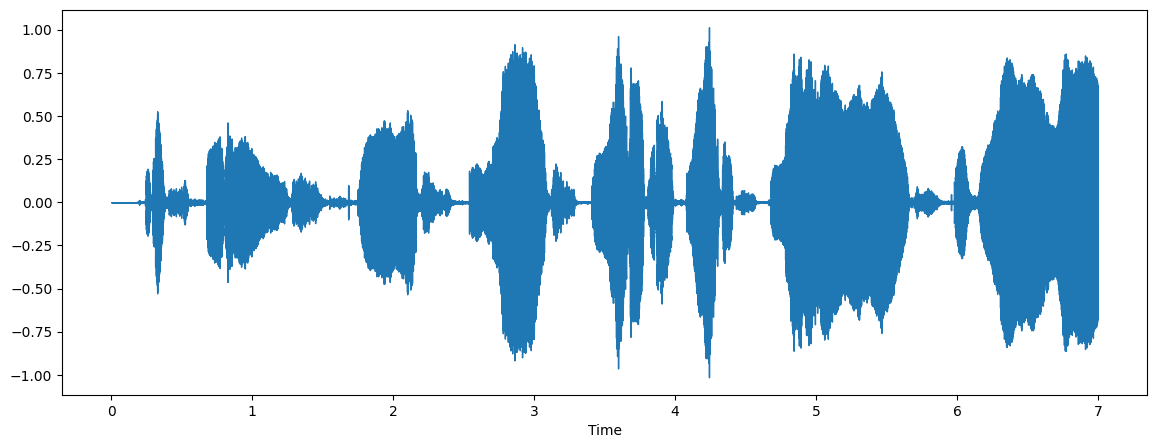

In [7]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(discomfort)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(discomfort)

# hungry

In [8]:
hungry = "baby_cry/hungry/090C15A8-5406-4EA5-97A3-81F6527227C0-1430147525-1.0-m-72-hu.wav"

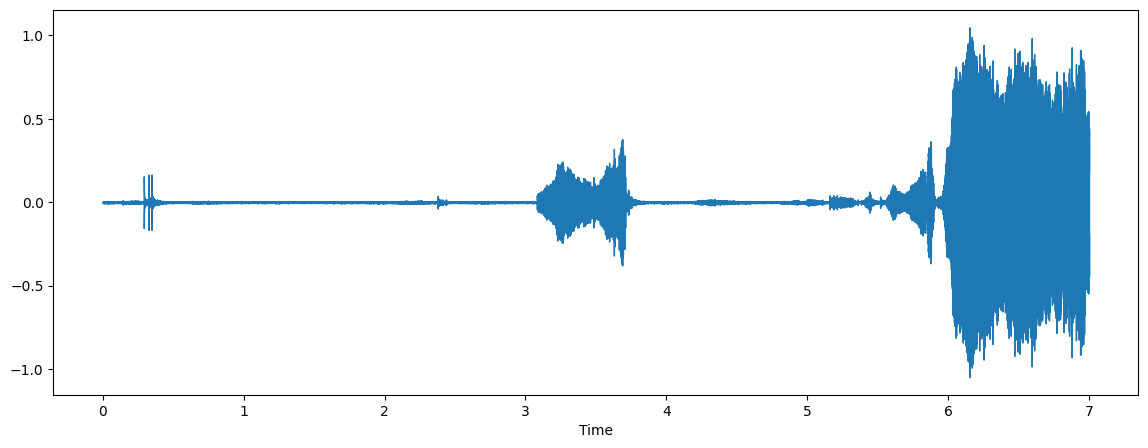

In [9]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(hungry)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(hungry)

# tired

In [10]:
tired = "baby_cry/tired/03ADDCFB-354E-416D-BF32-260CF47F7060-1433658024-1.1-f-04-ti.wav"

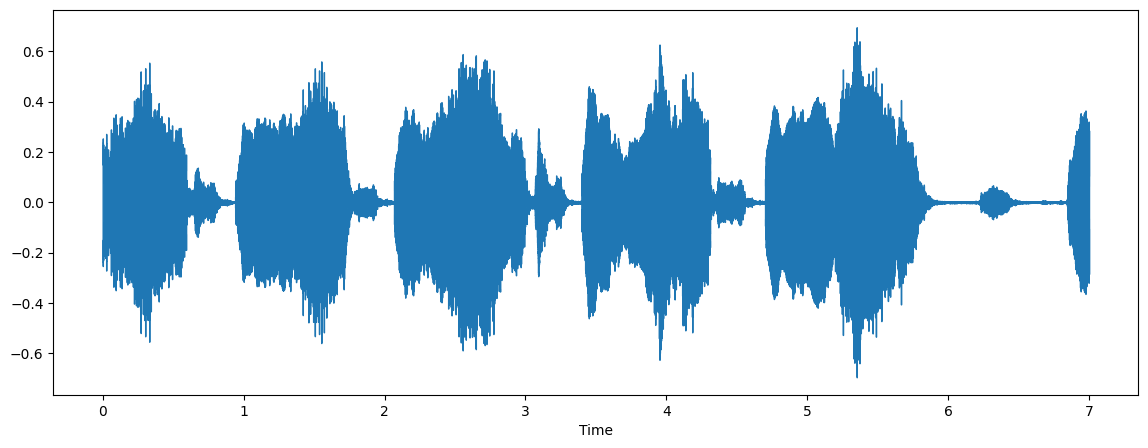

In [11]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(tired)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(tired)

# preprocessing

In [12]:
dataset_path = "baby_cry/"

In [13]:
def feature_extractor(file):
    audio,sampleRate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sampleRate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [14]:
extracted_features = []
folders = os.listdir(dataset_path)
for folder in folders:
    for file in os.listdir(dataset_path + folder):
        file_name = dataset_path + folder + '/' + file
        final_label = folder
        data = feature_extractor(file_name)
        extracted_features.append([data,final_label])

/tmp/ipykernel_74044/1269440782.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio,sampleRate = librosa.load(file)
/home/airi/miniconda3/envs/convert2/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_74044/1269440782.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio,sampleRate = librosa.load(file)
/home/airi/miniconda3/envs/convert2/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_74044/1269440782.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio,sampleRate = librosa.load(file)
/ho

In [15]:
len(extracted_features)

520

In [16]:
df = pd.DataFrame(extracted_features,columns=['feature','class'])
df

,feature,class
0,"[-420.8482, 152.88312, -56.196068, -6.3674965,...",belly_pain
1,"[-497.13657, 110.352684, -51.188683, -15.02914...",belly_pain
2,"[-424.96246, 146.32152, -71.41112, -10.220895,...",belly_pain
3,"[-310.2764, 170.54625, -66.570526, 5.4694333, ...",belly_pain
4,"[-409.53317, 188.9844, -98.38361, 4.3765216, 1...",belly_pain
...,...,...
515,"[-323.67352, 128.01878, -63.651928, 24.335175,...",burping
516,"[-354.24875, 111.98898, -8.349384, -2.471759, ...",burping
517,"[-244.97653, 120.40436, -98.650505, -7.5391774...",burping
518,"[-232.08612, 143.85428, -145.75955, 7.379399, ...",burping


In [17]:
df.to_csv('data.csv' , index = False)

In [18]:
df.shape

(520, 2)

In [19]:
x = np.array(df['feature'].tolist())
y = np.array(df['class'].tolist())

In [20]:
x.shape

(520, 40)

In [21]:
y.shape

(520,)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [23]:
x_train.shape

(468, 40)

In [24]:
x_test.shape

(52, 40)

In [25]:
y_train.shape
y_train = np.array(pd.get_dummies(y_train))

In [26]:
y_train.shape

(468, 5)

In [27]:
y_test = np.array(pd.get_dummies(y_test))
y_test.shape

(52, 5)

In [28]:
mean = x_train.mean(axis = 0)
std = x_train.std(axis = 0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [29]:
x_train[0]

array([-1.2295340e+00,  3.3846293e-02,  6.4299983e-01, -7.3466820e-01,
        1.9321371e-02,  1.8157108e-01, -1.1737607e+00, -8.0152822e-01,
        4.8253223e-01, -7.0658469e-01, -1.6084833e-01,  1.2605780e-01,
       -6.0188162e-01,  2.5241408e-01, -6.2444568e-01, -1.4983119e+00,
       -2.8501770e-02,  2.2607102e-01,  2.0732360e-01,  1.4358277e+00,
        9.2568535e-01, -8.2267962e-02,  8.2255512e-01, -4.1191092e-01,
        1.1064651e-01,  6.8891668e-01, -1.3140301e+00, -1.3509388e+00,
        2.2087434e-01, -8.0095655e-01, -6.4976585e-01, -4.4999558e-01,
       -1.4720820e+00, -6.3084900e-02,  8.9958185e-01, -6.3814694e-01,
        7.0605743e-01,  1.8087162e+00,  5.9841061e-01, -2.8611749e-04],
      dtype=float32)

## Train(with only denses)

In [31]:
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='models/model1.h5', 
                               verbose=1, save_best_only=True)

model1 = keras.models.Sequential([   
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(200 , activation = 'relu'),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation="softmax")
])

In [32]:
model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [33]:
history = model1.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test) , callbacks = [checkpointer])

Epoch 1/50


2023-10-30 16:29:24.516699: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5443f570 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-30 16:29:24.516730: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-30 16:29:24.516737: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-30 16:29:24.524863: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-30 16:29:24.567788: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8902
2023-10-30 16:29:24.663499: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 1/15 [=>............................] - ETA: 31s - loss: 1.4250 - accuracy: 0.4062
Epoch 1: val_loss improved from inf to 0.90240, saving model to model1.h5
15/15 [==============================] - 2s 14ms/step - loss: 0.9463 - accuracy: 0.7564 - val_loss: 0.9024 - val_accuracy: 0.7885
Epoch 2/50
 1/15 [=>............................] - ETA: 0s - loss: 0.7579 - accuracy: 0.7812
Epoch 2: val_loss improved from 0.90240 to 0.84229, saving model to model1.h5
15/15 [==============================] - 0s 5ms/step - loss: 0.7233 - accuracy: 0.8034 - val_loss: 0.8423 - val_accuracy: 0.8077
Epoch 3/50
 1/15 [=>............................] - ETA: 0s - loss: 0.7065 - accuracy: 0.8125
Epoch 3: val_loss improved from 0.84229 to 0.81594, saving model to model1.h5
15/15 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.7991 - val_loss: 0.8159 - val_accuracy: 0.8269
Epoch 4/50
 1/15 [=>............................] - ETA: 0s - loss: 0.4330 - accuracy: 0.8750

/home/airi/miniconda3/envs/convert2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 0.81594 to 0.80194, saving model to model1.h5
15/15 [==============================] - 0s 7ms/step - loss: 0.6638 - accuracy: 0.8077 - val_loss: 0.8019 - val_accuracy: 0.8077
Epoch 5/50
 1/15 [=>............................] - ETA: 0s - loss: 0.5845 - accuracy: 0.8750
Epoch 5: val_loss improved from 0.80194 to 0.75120, saving model to model1.h5
15/15 [==============================] - 0s 5ms/step - loss: 0.6089 - accuracy: 0.8226 - val_loss: 0.7512 - val_accuracy: 0.8077
Epoch 6/50
 1/15 [=>............................] - ETA: 0s - loss: 0.6798 - accuracy: 0.8125
Epoch 6: val_loss did not improve from 0.75120
15/15 [==============================] - 0s 4ms/step - loss: 0.6048 - accuracy: 0.8248 - val_loss: 0.7728 - val_accuracy: 0.8269
Epoch 7/50
 1/15 [=>............................] - ETA: 0s - loss: 0.6644 - accuracy: 0.7188
Epoch 7: val_loss improved from 0.75120 to 0.74539, saving model to model1.h5
15/15 [==============================] - 0s 5ms/s

In [34]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                

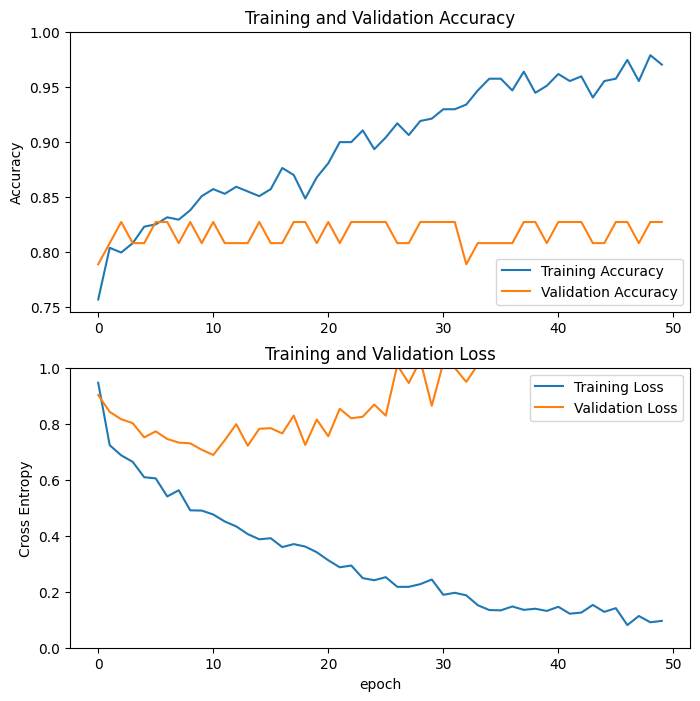

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [36]:
model1.evaluate(x_test , y_test)

2/2 [==============================] - 0s 5ms/step - loss: 1.5825 - accuracy: 0.8269


[1.5825353860855103, 0.8269230723381042]

In [37]:
model1.save('models/model1.h5')

/home/airi/miniconda3/envs/convert2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Train(with CNN)

In [39]:
checkpointer = ModelCheckpoint(filepath='models/model2.h5', 
                               verbose=1, save_best_only=True)

model2 = keras.models.Sequential([    
    keras.layers.Reshape((-1 , 40 , 1)) , 
    keras.layers.Conv2D(16, (1,3), padding = 'same', activation='relu'),
    keras.layers.MaxPooling2D((1,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(32, (1,3), padding = 'same', activation='relu'),
    keras.layers.MaxPooling2D((1,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (1,3), padding = 'same', activation='relu'),
    keras.layers.MaxPooling2D((1,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation="softmax")
])

In [40]:
model2.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [42]:
history2 = model2.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test) , callbacks = [checkpointer])

Epoch 1/50


2023-10-30 16:34:21.027148: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


15/15 [==============================] - ETA: 0s - loss: 0.9882 - accuracy: 0.7286 
Epoch 1: val_loss improved from inf to 0.92211, saving model to model2.h5
15/15 [==============================] - 2s 25ms/step - loss: 0.9882 - accuracy: 0.7286 - val_loss: 0.9221 - val_accuracy: 0.7885
Epoch 2/50
 1/15 [=>............................] - ETA: 0s - loss: 0.6142 - accuracy: 0.8438
Epoch 2: val_loss did not improve from 0.92211
15/15 [==============================] - 0s 5ms/step - loss: 0.7832 - accuracy: 0.7949 - val_loss: 0.9622 - val_accuracy: 0.7885
Epoch 3/50
 1/15 [=>............................] - ETA: 0s - loss: 1.1653 - accuracy: 0.6875
Epoch 3: val_loss improved from 0.92211 to 0.91396, saving model to model2.h5
15/15 [==============================] - 0s 5ms/step - loss: 0.7797 - accuracy: 0.7949 - val_loss: 0.9140 - val_accuracy: 0.7885
Epoch 4/50
 1/15 [=>............................] - ETA: 0s - loss: 0.7947 - accuracy: 0.7188

/home/airi/miniconda3/envs/convert2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 0.91396 to 0.89666, saving model to model2.h5
15/15 [==============================] - 0s 7ms/step - loss: 0.7519 - accuracy: 0.7949 - val_loss: 0.8967 - val_accuracy: 0.7885
Epoch 5/50
 1/15 [=>............................] - ETA: 0s - loss: 0.6242 - accuracy: 0.8438
Epoch 5: val_loss improved from 0.89666 to 0.88808, saving model to model2.h5
15/15 [==============================] - 0s 7ms/step - loss: 0.7382 - accuracy: 0.7949 - val_loss: 0.8881 - val_accuracy: 0.7885
Epoch 6/50
 1/15 [=>............................] - ETA: 0s - loss: 0.5829 - accuracy: 0.9062
Epoch 6: val_loss improved from 0.88808 to 0.84416, saving model to model2.h5
15/15 [==============================] - 0s 8ms/step - loss: 0.7253 - accuracy: 0.8034 - val_loss: 0.8442 - val_accuracy: 0.7885
Epoch 7/50
 1/15 [=>............................] - ETA: 0s - loss: 0.8308 - accuracy: 0.7812
Epoch 7: val_loss did not improve from 0.84416
15/15 [==============================] - 0s 4ms/s

In [43]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1, 40, 1)          0         
                                                                 
 conv2d (Conv2D)             (None, 1, 40, 16)         64        
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 20, 16)         0         
 D)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 1, 20, 16)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 20, 32)         1568      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 10, 32)         0         
 g2D)                                                 

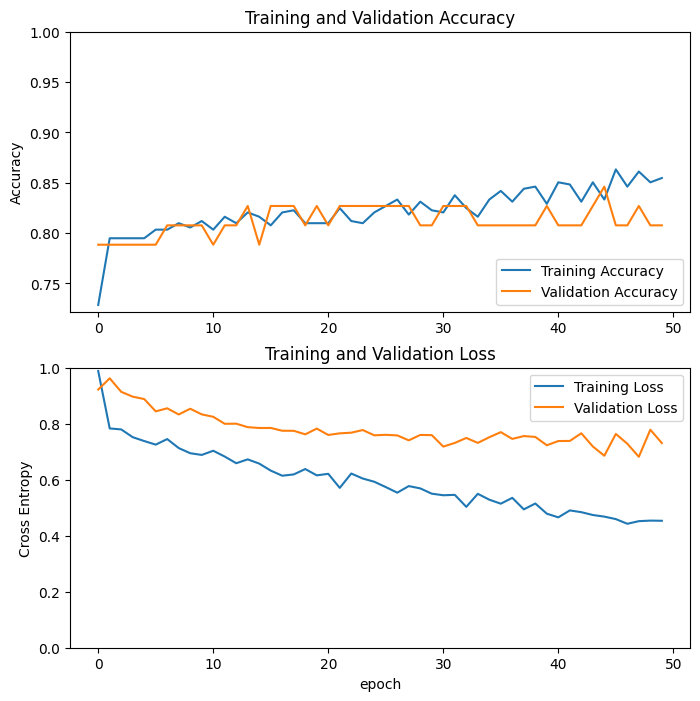

In [44]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [45]:
model2.evaluate(x_test , y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.7309 - accuracy: 0.8077


[0.730891764163971, 0.807692289352417]

In [46]:
model2.save('model2.h5')

/home/airi/miniconda3/envs/convert2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Data augmentation

In [47]:
def augment_data(X, y, noise_factor=0.1):
    # Generate random noise with the same shape as X
    noise = np.random.normal(loc=0, scale=noise_factor, size=X.shape)
    # Add noise to the features
    augmented_X = X + noise
    # No changes to the target variable y
    augmented_y = y
    return augmented_X, augmented_y

In [48]:
augh_x, augh_y = augment_data(x_train , y_train)

In [49]:
x_train = np.append(x_train , augh_x , axis = 0)

In [50]:
x_train.shape

(936, 40)

In [51]:
y_train = np.append(y_train , augh_y , axis = 0)

In [52]:
y_train.shape

(936, 5)

## Train(with CNN and data augmentation)

In [53]:
checkpointer = ModelCheckpoint(filepath='models/model3.h5', 
                               verbose=1, save_best_only=True)

model3 = keras.models.Sequential([    
    keras.layers.Reshape((-1 , 40 , 1)) , 
    keras.layers.Conv2D(16, (1,3), padding = 'same', activation='relu'),
    keras.layers.MaxPooling2D((1,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(32, (1,3), padding = 'same', activation='relu'),
    keras.layers.MaxPooling2D((1,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (1,3), padding = 'same', activation='relu'),
    keras.layers.MaxPooling2D((1,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation="softmax")
])

In [54]:
model3.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [55]:
history3 = model3.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test) , callbacks = [checkpointer])

Epoch 1/50


2023-10-30 16:38:30.498639: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_10/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - ETA: 0s - loss: 0.9426 - accuracy: 0.7585
Epoch 1: val_loss improved from inf to 0.92987, saving model to model3.h5
30/30 [==============================] - 1s 14ms/step - loss: 0.9426 - accuracy: 0.7585 - val_loss: 0.9299 - val_accuracy: 0.7885
Epoch 2/50
17/30 [================>.............] - ETA: 0s - loss: 0.8000 - accuracy: 0.7978
Epoch 2: val_loss improved from 0.92987 to 0.89128, saving model to model3.h5
30/30 [==============================] - 0s 6ms/step - loss: 0.7702 - accuracy: 0.7959 - val_loss: 0.8913 - val_accuracy: 0.7885
Epoch 3/50
 1/30 [>.............................] - ETA: 0s - loss: 0.7737 - accuracy: 0.6875

/home/airi/miniconda3/envs/convert2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/30 [============================>.] - ETA: 0s - loss: 0.7515 - accuracy: 0.8006
Epoch 3: val_loss improved from 0.89128 to 0.88815, saving model to model3.h5
30/30 [==============================] - 0s 5ms/step - loss: 0.7522 - accuracy: 0.8002 - val_loss: 0.8881 - val_accuracy: 0.7885
Epoch 4/50
18/30 [=================>............] - ETA: 0s - loss: 0.7527 - accuracy: 0.7847
Epoch 4: val_loss improved from 0.88815 to 0.86762, saving model to model3.h5
30/30 [==============================] - 0s 5ms/step - loss: 0.7191 - accuracy: 0.8024 - val_loss: 0.8676 - val_accuracy: 0.7885
Epoch 5/50
29/30 [============================>.] - ETA: 0s - loss: 0.7037 - accuracy: 0.8039
Epoch 5: val_loss did not improve from 0.86762
30/30 [==============================] - 0s 5ms/step - loss: 0.7057 - accuracy: 0.8024 - val_loss: 0.8760 - val_accuracy: 0.8077
Epoch 6/50
19/30 [==================>...........] - ETA: 0s - loss: 0.6935 - accuracy: 0.7944
Epoch 6: val_loss improved from 0.86762 to 0.

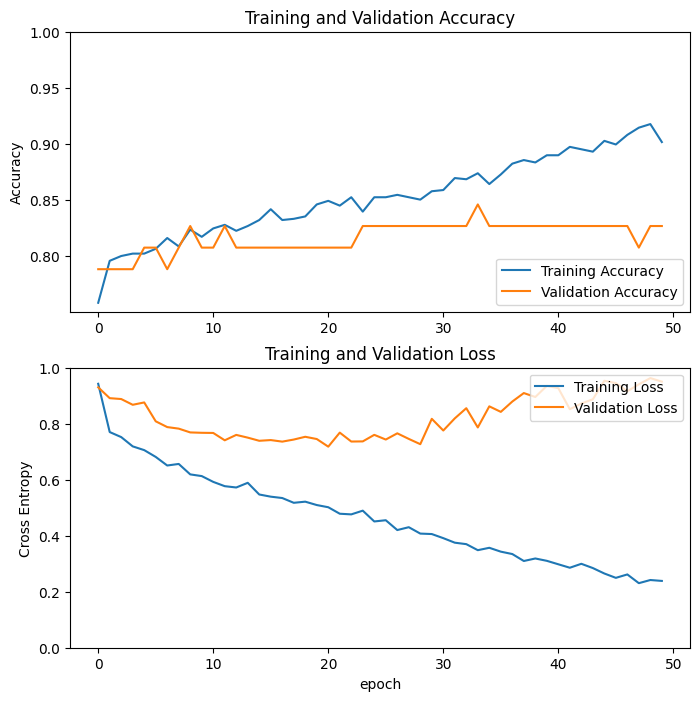

In [56]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [57]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 1, 40, 1)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 40, 16)         64        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 20, 16)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 1, 20, 16)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 20, 32)         1568      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 10, 32)         0         
 g2D)                                                 

In [58]:
model3.save('models/model3.h5')

/home/airi/miniconda3/envs/convert2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
model3.evaluate(x_test , y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.9503 - accuracy: 0.8269


[0.9503483176231384, 0.8269230723381042]

## Load and Use

In [61]:
model = keras.models.load_model('models/model3.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 1, 40, 1)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 40, 16)         64        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 20, 16)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 1, 20, 16)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 20, 32)         1568      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 10, 32)         0         
 g2D)                                                 

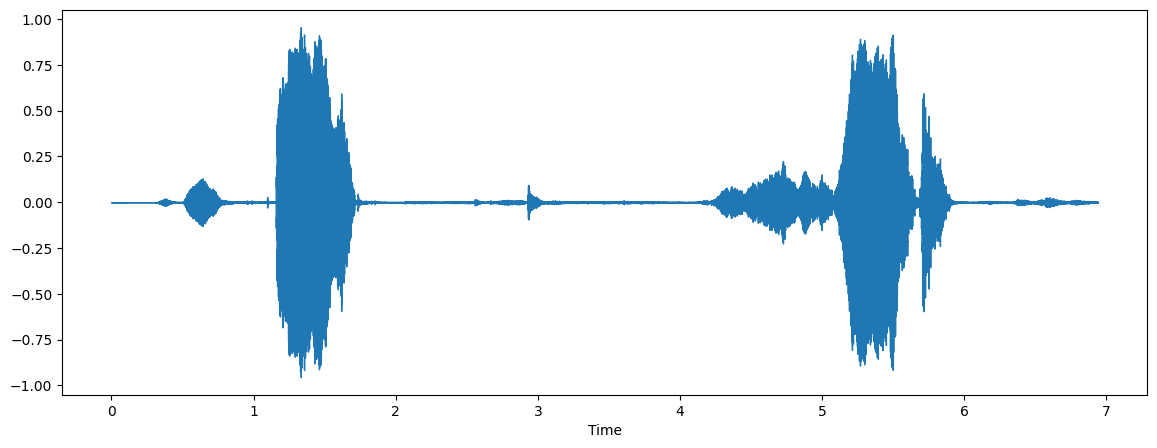

In [64]:
voice = 'baby_cry/hungry/0c8f14a9-6999-485b-97a2-913c1cbf099c-1430760379259-1.7-m-26-hu.wav'
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(voice)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(voice)

In [ ]:
def feature_extractor(file):
    audio,sampleRate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sampleRate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [71]:
data = feature_extractor(voice)
data = data.reshape(-1 , 40 , 1)

In [72]:
data.shape

(1, 40, 1)

In [76]:
classes = ['belly_pain' , 'burping' , 'discomfort' , 'hungry' , 'tired']

In [74]:
model.predict(data)

1/1 [==============================] - 0s 129ms/step


array([[8.8864228e-30, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.3199539e-35]], dtype=float32)

In [77]:
print(classes[np.argmax(model.predict(data))])

1/1 [==============================] - 0s 25ms/step
hungry
